In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [525]:
df=pd.read_excel('flight_train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [526]:
test_data=pd.read_excel('flight_test.xlsx')

In [527]:
df=pd.concat([df, test_data],ignore_index=True).reset_index()

In [528]:
df.shape

(13354, 12)

In [529]:
df['Route'].nunique()

132

In [530]:
df['Date_of_Journey'].dtype

dtype('O')

In [531]:
df['Dep_Time'].dtype

dtype('O')

In [532]:
df.columns

Index(['index', 'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [533]:
df.isnull().sum()
#null values are present in very less columns
#So we are dropping those columns

index                 0
Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [534]:
df=df.dropna()

In [535]:
df.shape

(10682, 12)

# EDA

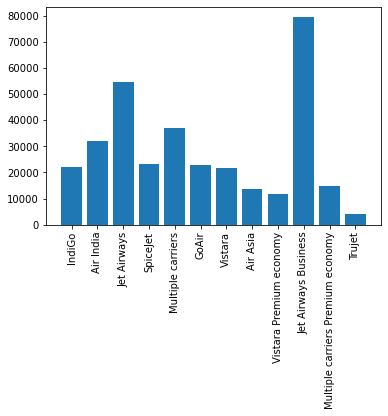

In [536]:
plt.bar(df['Airline'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

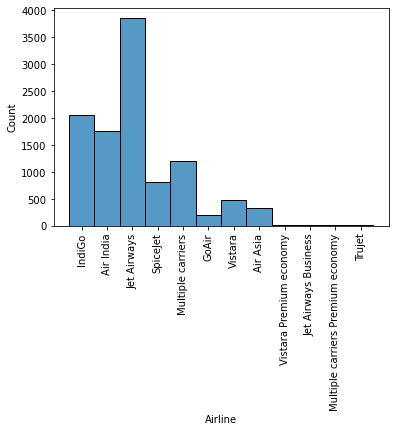

In [537]:
sns.histplot(df['Airline'])
plt.xticks(rotation='vertical')
plt.show()

In [538]:
#Applying LabelEncoder on Airline column.

le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])

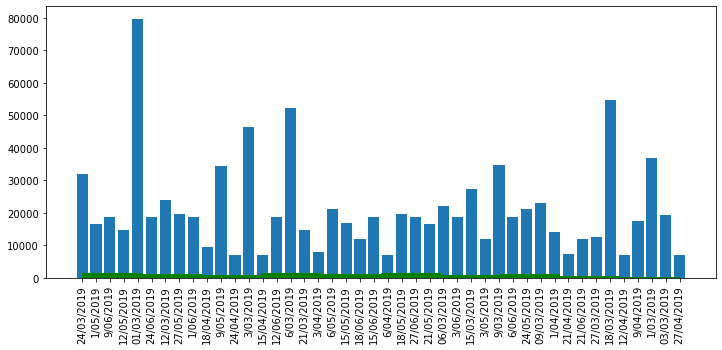

In [539]:
plt.figure(figsize=(12,5))
plt.bar(df['Date_of_Journey'],df['Price'])
plt.hist(df['Date_of_Journey'],color='green')
plt.xticks(rotation='vertical')
plt.show()

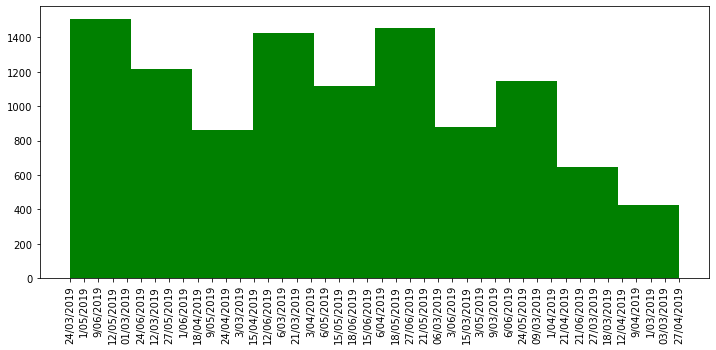

In [540]:
plt.figure(figsize=(12,5))
plt.hist(df['Date_of_Journey'],color='green')
plt.xticks(rotation='vertical')
plt.show()

In [541]:
#converting to pandas.datetime functions

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [542]:
df['Journey_year']=df['Date_of_Journey'].dt.year
df['Journey_month']=df['Date_of_Journey'].dt.month
df['Journey_day']=df['Date_of_Journey'].dt.day

In [543]:
#df=df.drop(columns=['Date_of_Journey'],axis=1)

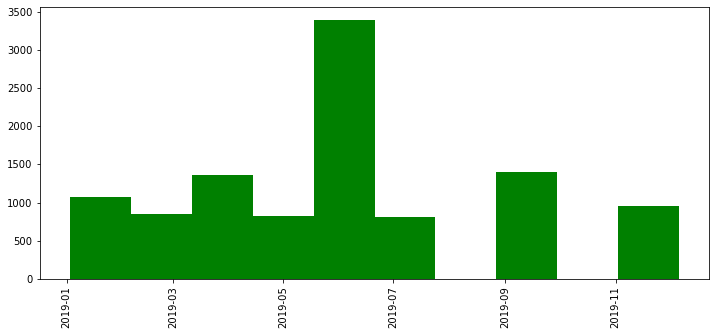

In [544]:
plt.figure(figsize=(12,5))
plt.hist(df['Date_of_Journey'],color='green')
plt.xticks(rotation='vertical')
plt.show()

#very high number of people have travelled in the mid part of the year.

In [545]:
df['Date_of_Journey'].nunique()

40

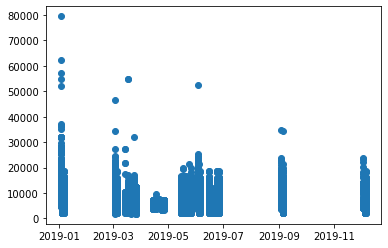

In [546]:
plt.scatter(df['Date_of_Journey'],df['Price'])

#Prices are higher during the begining part of the year.

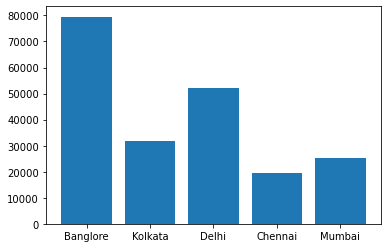

In [547]:

plt.bar(df['Source'],df['Price'])


plt.show()

#Tickets of highest price have been bought from bangaLore.

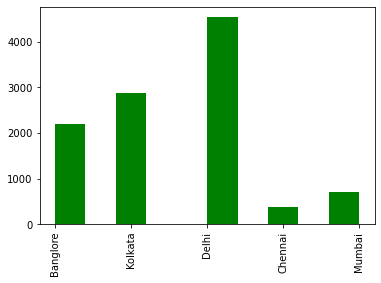

In [548]:

plt.hist(df['Source'],color='green')
plt.xticks(rotation='vertical')
plt.show()

#Maximum number of tickets have been bought from Delhi and minimum from Chennai.

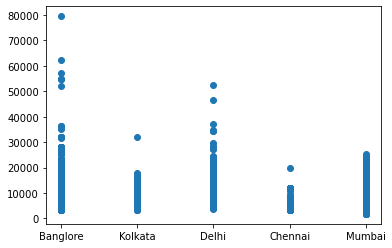

In [549]:
plt.scatter(df['Source'],df['Price'])

In [550]:
#Applying LabelEncoder on Source column.

le=LabelEncoder()
df['Source']=le.fit_transform(df['Source'])

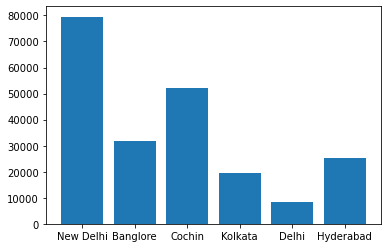

In [551]:
plt.bar(df['Destination'],df['Price'])


plt.show()


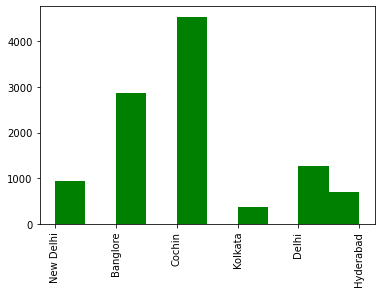

In [552]:
plt.hist(df['Destination'],color='green')
plt.xticks(rotation='vertical')
plt.show()

#Ticket price was maximum when destination was Cochin

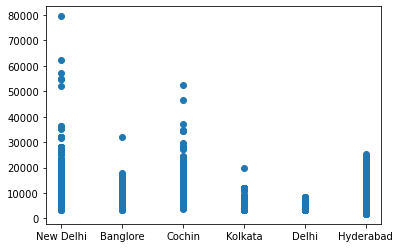

In [553]:
plt.scatter(df['Destination'],df['Price'])

In [554]:
#Applying LabelEncoder on Destination column.

le=LabelEncoder()
df['Destination']=le.fit_transform(df['Destination'])

In [555]:
df['Route'].nunique()

128

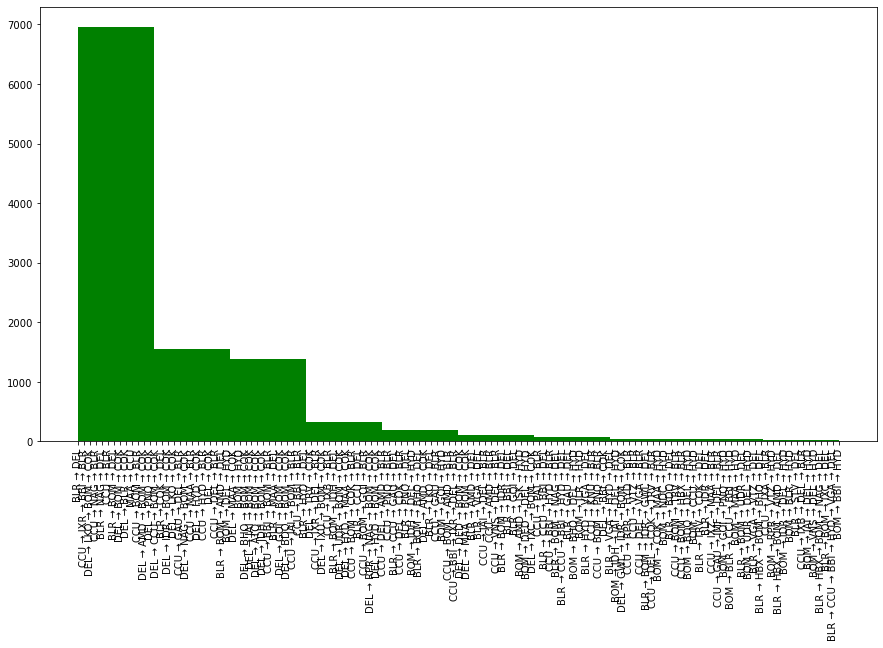

In [556]:
plt.figure(figsize=(15,8))
plt.hist(df['Route'],color='green')
plt.xticks(rotation='vertical')
plt.show()

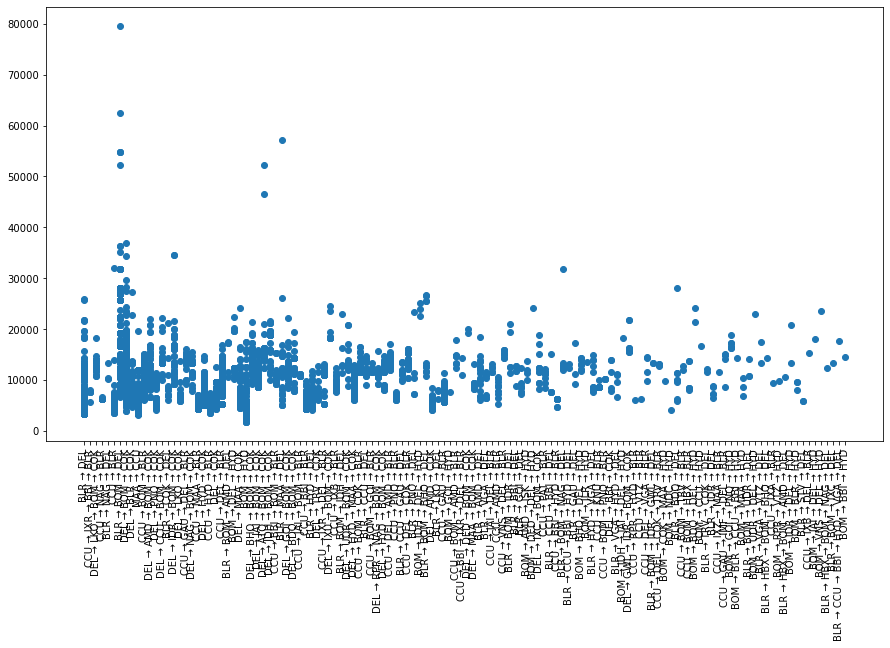

In [557]:
plt.figure(figsize=(15,8))
plt.scatter(df['Route'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#It is hard to derive any conclusion from this graph.

In [558]:
#Applying LabelEncoder on Route column.

le=LabelEncoder()
df['Route']=le.fit_transform(df['Route'])

In [559]:
#converting to time format
from datetime import datetime


In [560]:
d_parser=lambda x:datetime.strptime(x, '%H:%M')

In [561]:
df['Dep_Time']=df['Dep_Time'].apply(d_parser)

In [562]:
df['Dep_Time_hr']=df['Dep_Time'].dt.hour
df['Dep_Time_minute']=df['Dep_Time'].dt.minute

In [563]:
df=df.drop(columns=['Dep_Time'],axis=1)

In [564]:
d_parser_1=lambda x:datetime.strptime(x.split()[0], '%H:%M')

In [565]:
df['Arrival_Time']=df['Arrival_Time'].apply(d_parser_1)

In [566]:
df['Arrival_Time_hr']=df['Arrival_Time'].dt.hour
df['Arrival_Time_minute']=df['Arrival_Time'].dt.minute

In [567]:
df=df.drop(columns=['Arrival_Time'],axis=1)

In [568]:
df=df.drop(columns=['Date_of_Journey'],axis=1)

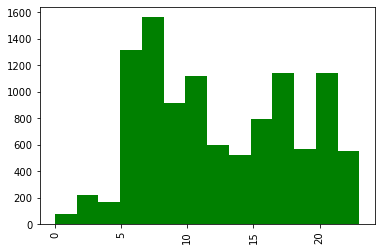

In [569]:
plt.hist(df['Dep_Time_hr'],color='green',bins=14)
plt.xticks(rotation='vertical')
plt.show()

#12 am to 5 am has less number of flights.

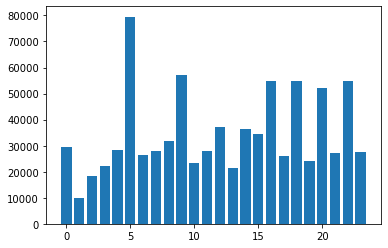

In [570]:
plt.bar(df['Dep_Time_hr'],df['Price'])


plt.show()


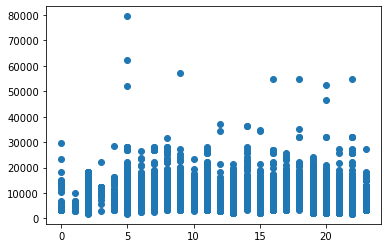

In [571]:
plt.scatter(df['Dep_Time_hr'],df['Price'])

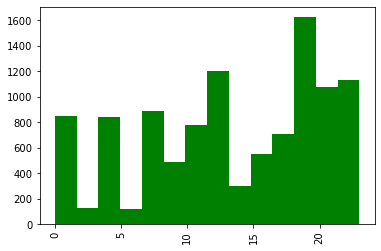

In [572]:
plt.hist(df['Arrival_Time_hr'],color='green',bins=14)
plt.xticks(rotation='vertical')
plt.show()

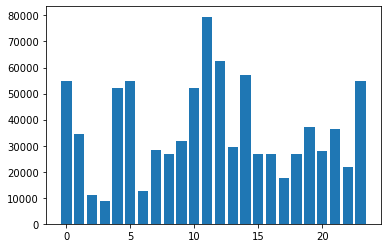

In [573]:
plt.bar(df['Arrival_Time_hr'],df['Price'])


plt.show()


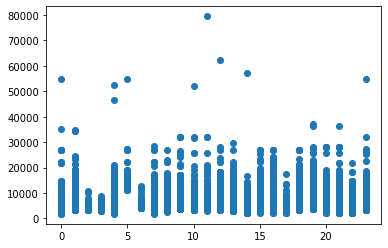

In [574]:
plt.scatter(df['Arrival_Time_hr'],df['Price'])

In [575]:
d_parser_2=lambda x:x.replace('h','').replace('m','').split()[0]

In [576]:
df['Duration_hrs']=df['Duration'].apply(d_parser_2)

In [577]:
df['Duration_hrs']=df['Duration_hrs'].astype(int)

In [578]:
d_parser_3=lambda x:x.replace('h','').replace('m','').split()[1] if (len(x.split())>1) else 0

In [579]:
df['Duration_mins']=df['Duration'].apply(d_parser_3)
    

In [580]:
df['Duration_mins']=df['Duration_mins'].astype(int)

In [584]:
df['Duration_tot_mins']=df['Duration_hrs']*60 + df['Duration_mins']

In [586]:
df=df.drop(columns=['Duration_hrs','Duration_mins'],axis=1)

In [590]:
df=df.drop(columns=['Duration'],axis=1)

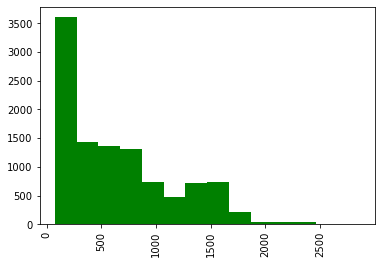

In [593]:
plt.hist(df['Duration_tot_mins'],color='green',bins=14)
plt.xticks(rotation='vertical')
plt.show()

#most flights take shot duration.

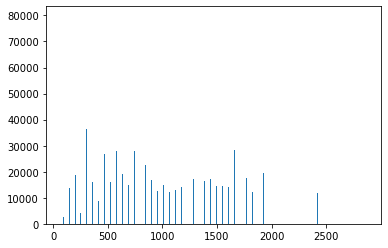

In [594]:
plt.bar(df['Duration_tot_mins'],df['Price'])


plt.show()

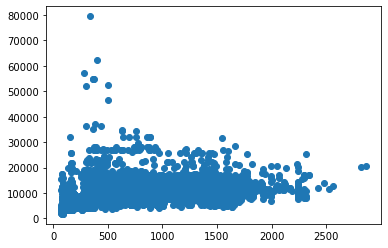

In [595]:
plt.scatter(df['Duration_tot_mins'],df['Price'])

#The lowest price for every minute travelled increases with the number of minutes travelled.

In [598]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

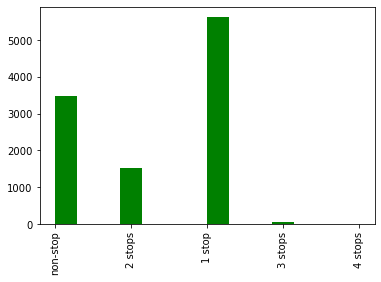

In [599]:
plt.hist(df['Total_Stops'],color='green',bins=14)
plt.xticks(rotation='vertical')
plt.show()

#maximum flights have only one stop follwed by the number of flights which are non-stop.

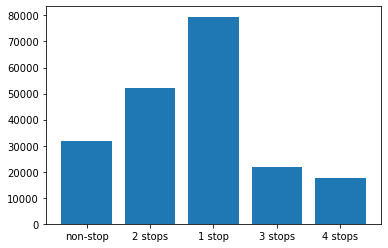

In [601]:
plt.bar(df['Total_Stops'],df['Price'])


plt.show()

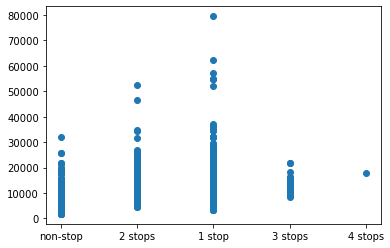

In [602]:
plt.scatter(df['Total_Stops'],df['Price'])

In [603]:
df['Total_Stops']=le.fit_transform(df['Total_Stops'])

In [605]:
df['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [607]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [608]:
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

In [610]:
df_new=df.drop(columns=['Price'],axis=1)

In [611]:
df_new['Price']=df['Price']

In [612]:
df=df_new

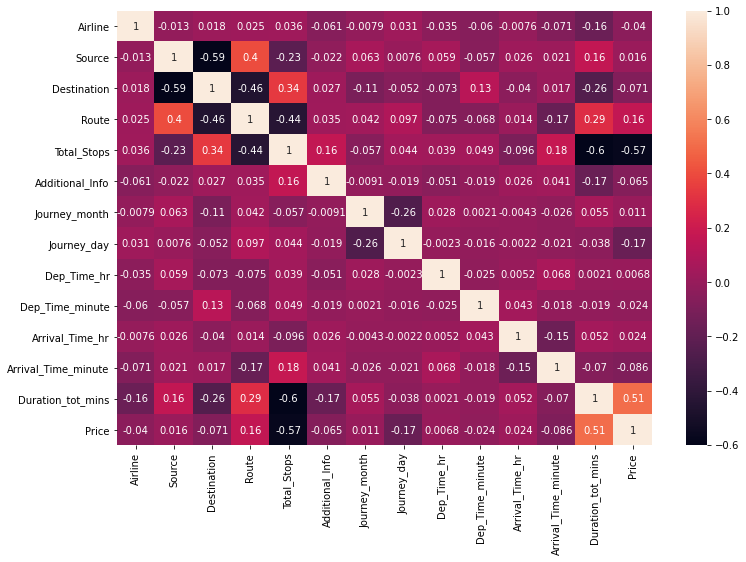

In [620]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [617]:
df=df.drop(columns=['index'],axis=1)

In [618]:
#'Journey_year' has no correlation with the target. Sp we are removing that column.
df=df.drop(columns=['Journey_year'],axis=1)

In [621]:
#'Dep_Time_hr' has very low correlation with target.
#'Dep_Time_minute' becomes irrelevant if 'Dep_Time_hr' is removed.
#So we are removing both the columns.
df=df.drop(columns=['Dep_Time_hr','Dep_Time_minute'],axis=1)

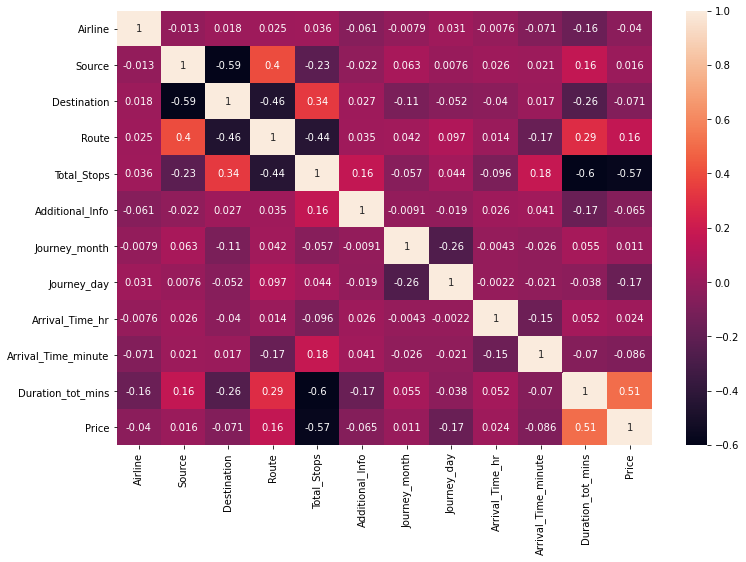

In [622]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [623]:
#checking the skewness present in data
df.skew().sort_values(ascending=False)

#some columns has high skewness. So we are applying Power_transform on columns having skewness greater than 0.65 ar less than -0.65

Price                  1.812405
Destination            1.244046
Duration_tot_mins      0.861541
Airline                0.731057
Total_Stops            0.631532
Journey_month          0.629556
Journey_day            0.367212
Arrival_Time_minute    0.110945
Arrival_Time_hr       -0.370146
Source                -0.424023
Route                 -0.501911
Additional_Info       -1.779689
dtype: float64

In [625]:
from sklearn.preprocessing import power_transform
df['Destination']=power_transform(df['Destination'].values.reshape(-1,1)) 

In [627]:
df['Duration_tot_mins']=power_transform(df['Duration_tot_mins'].values.reshape(-1,1)) 

In [629]:
df['Airline']=power_transform(df['Airline'].values.reshape(-1,1)) 

In [631]:
df['Additional_Info']=power_transform(df['Additional_Info'].values.reshape(-1,1)) 

In [632]:
df.skew().sort_values(ascending=False)

#sknewness reduced

Price                  1.812405
Total_Stops            0.631532
Journey_month          0.629556
Journey_day            0.367212
Arrival_Time_minute    0.110945
Destination            0.041570
Airline               -0.015281
Duration_tot_mins     -0.044793
Arrival_Time_hr       -0.370146
Source                -0.424023
Route                 -0.501911
Additional_Info       -1.371943
dtype: float64

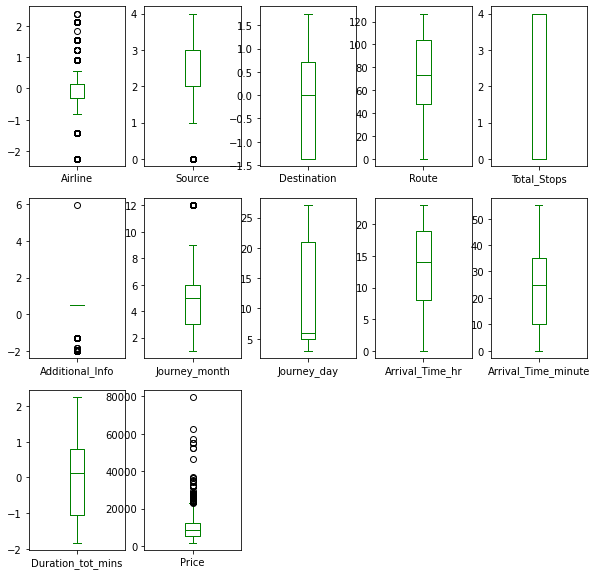

In [633]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10),color='green')
plt.show()

In [635]:
df['Airline'].nunique()

#Removing outliers from 'Airline' column will be removing some airlines which is undesired.
#So we are not removing outliers from 'Airline' coulumn.

12

In [636]:
df['Source'].nunique()

5

In [641]:
from scipy.stats import zscore
z=np.abs(zscore(df['Additional_Info']))


df_new=df[(z<3)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(10682, 12)
(10681, 12)
loss_percent=  0.009361542782250515


In [642]:
df=df_new

In [646]:
from scipy.stats import zscore
z=np.abs(zscore(df['Price']))


df_new=df[(z<3)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(10681, 12)
(10585, 12)
loss_percent=  0.8987922479168617


In [647]:
df=df_new

In [648]:
df.shape

(10585, 12)

# MODEL TRAINING BEGINS

In [665]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

In [672]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]


x_train=df.iloc[0:8468,0:-1]
y_train=df.iloc[0:8468,-1]
x_test=df.iloc[8468:10585,0:-1]
y_test=df.iloc[8468:10585,-1]

#we are not using train_test_split becuse we are already given the training and testing data.
#we previously merged the training and testing data.
#Here we are separating the training and testing data.

In [683]:
x_train.shape

(8468, 11)

In [684]:
y_train.shape

(8468,)

In [685]:
x_test.shape

(2117, 11)

In [686]:
y_test.shape

(2117,)

In [677]:
#trying different regression models with n_components=5

pca=PCA(n_components=5)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.07804243920508447
r2_score for RandomForestRegression is:  0.5686607288288877
r2_score for KNeighborsRegression is:  0.641139838347215


In [678]:
#trying different regression models with n_components=6

pca=PCA(n_components=6)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.3980211307832048
r2_score for RandomForestRegression is:  0.6942820738461069
r2_score for KNeighborsRegression is:  0.6873615596350551


In [679]:
#trying different regression models with n_components=7

pca=PCA(n_components=7)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.3101296858254723
r2_score for RandomForestRegression is:  0.5873433287346822
r2_score for KNeighborsRegression is:  0.6662057641569128


In [680]:
#trying different regression models with n_components=8

pca=PCA(n_components=8)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.31349634815601324
r2_score for RandomForestRegression is:  0.6293428051295623
r2_score for KNeighborsRegression is:  0.7300083737212866


In [681]:
#trying different regression models with n_components=9

pca=PCA(n_components=9)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.32246098531083955
r2_score for RandomForestRegression is:  0.6501147021529023
r2_score for KNeighborsRegression is:  0.7358099414481309


In [682]:
#trying different regression models with n_components=10

pca=PCA(n_components=10)
xpca=pca.fit_transform(x_train)
xpca_test=pca.fit_transform(x_test)
xpca=pd.DataFrame(xpca)
xpca_test=pd.DataFrame(xpca_test)
lr=LinearRegression()
lr.fit(xpca,y_train)
y_pred_lr=lr.predict(xpca_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(xpca,y_train)
y_pred_rfr=rfr.predict(xpca_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(xpca,y_train)
y_pred_knr=knr.predict(xpca_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.32914915008955736
r2_score for RandomForestRegression is:  0.7409286520055935
r2_score for KNeighborsRegression is:  0.7372406822013952


In [688]:
#trying without PCA



lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))


#We are getting best results without applying PCA

r2_score for LinearRegression is:  0.5027286104675228
r2_score for RandomForestRegression is:  0.9212189033283326
r2_score for KNeighborsRegression is:  0.74525247468746


# Regression model Training Process Begins

In [689]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

#### Lets try out the best polynomial for LinearRegression

In [690]:
max_cv_score=0
best_polynomial=0
for i in range(1,4):
    poly = PolynomialFeatures(i)
    X_=poly.fit_transform(x)
    lr =LinearRegression()
    lsscore=cross_val_score(lr,X_,y,cv=5)
    if lsscore.mean()>max_cv_score:
        max_cv_score=lsscore.mean()
        best_polynomial=i

print(max_cv_score)
print(best_polynomial)

#Hence the best polynomial is 2

0.6594608116989701
2


In [691]:
#We are not checking the best random_state because we are already given the training and testing data.

# Training the final LinearRegression model.

In [694]:
lr=LinearRegression()
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x_train)
x_pca_test=poly.fit_transform(x_test)
lr.fit(X_,y_train)
y_pred=lr.predict(x_pca_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)

r2_score is:  0.661637341726149
root_mean_sqaured_error: 2354.385039608563


# Lets find out the best polynomial for ridge regression mode

In [699]:
max_cv_score=0
best_polynomial=0
for i in range(1,4):
    poly = PolynomialFeatures(i)
    X_=poly.fit_transform(x)
    lr =Ridge(alpha=0.1)
    lsscore=cross_val_score(lr,X_,y,cv=5)
    if lsscore.mean()>max_cv_score:
        max_cv_score=lsscore.mean()
        best_polynomial=i

print(max_cv_score)
print(best_polynomial)

#Best polynomial for ridge regression model is 3

0.738133216375155
3


In [698]:
#finding out the best parameters for ridge regression model with polynomial degree=3
r=Ridge()
parameters={'alpha':[0.1,0.01,0.001],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
gd_sr=GridSearchCV(estimator=r, param_grid= parameters, scoring='r2')
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)

gd_sr.fit(X_,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'alpha': 0.1, 'solver': 'svd'}
0.7381332164290704


In [701]:
#traing the ridge regression model with the best parameters obtained.
r=Ridge(alpha= 0.1, solver= 'svd')
poly = PolynomialFeatures(3)
xpca=poly.fit_transform(x_train)
xpca_test=poly.fit_transform(x_test)
r.fit(xpca,y_train)
y_pred=r.predict(xpca_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)

r2_score is:  0.7442002516473614
root_mean_sqaured_error: 2047.087148425276


#### Trying the Lasso_regression model

In [702]:
#Finding the best polynomial degree for lasso regressionm.
max_cv_score=0
best_polynomial=0
for i in range(1,4):
    poly = PolynomialFeatures(i)
    X_=poly.fit_transform(x)
    lr =Lasso(alpha=0.1)
    lsscore=cross_val_score(lr,X_,y,cv=5)
    if lsscore.mean()>max_cv_score:
        max_cv_score=lsscore.mean()
        best_polynomial=i

print(max_cv_score)
print(best_polynomial)

#Best polynomial for ridge regression model is 3

0.7343988543491798
3


In [703]:
#finding out the best parameters for lasso regression model with polynomial degree=3
l=Lasso()
parameters={'alpha':[0.1,0.01,0.001],'selection':['cyclic','random']}
gd_sr=GridSearchCV(estimator=l, param_grid= parameters, scoring='r2')
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)

gd_sr.fit(X_,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#accuracy has increased slightly.

{'alpha': 0.001, 'selection': 'random'}
0.7366365884343545


In [704]:
#training the final Lasso Regression model.

l=Lasso(alpha=0.001)
xpca=poly.fit_transform(x_train)
xpca_test=poly.fit_transform(x_test)
l.fit(xpca,y_train)
y_pred=l.predict(xpca_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)


r2_score is:  0.7364661558615628
root_mean_sqaured_error: 2077.803501933012


#### Trying the KNeighbors regression model

In [712]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':[5,6,7,10,15,20,25,30,80,90,100],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.7824491629363566


In [713]:
#training the final KNeighbors regression model
knr=KNeighborsRegressor(algorithm='auto',n_neighbors=5,weights='distance')
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)

r2_score is:  0.7816983492703538
root_mean_sqaured_error: 1891.1012653363864


# Trying the Decision Tree Regression model

In [721]:
#trying to find out the best parameters for random forest regressor.
rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120],'max_depth':[10,13,15,17,20,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 20, 'n_estimators': 120}
0.9186865881367783


In [723]:
#trying to find out the best parameters for random forest regressor.
rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120,130,140],'max_depth':[15,17,20,23,25,27,30,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#this is the maximum obtained accuracy.
#Hence we are finalising RandonForestRegressor with the obtained parameters.

{'max_depth': 25, 'n_estimators': 110}
0.9194284536811995


# Training the final model

In [724]:
rfr=RandomForestRegressor(n_estimators=130,max_depth=20)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is:  0.9238721525901006
root_mean_sqaured_error: 1116.7553720591175
mean_absolute_error: 589.0126186387141


In [725]:
#saving the best model.
import pickle
filename='flight.pkl'
pickle.dump(rfr,open(filename,'wb'))